In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy import sin, pi

import dsp_lib

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib notebook

Many signals are periodic. An example of a periodic sine signal is shown below. The frequency of this signal is $f = 0.08$ cycles / sample. In other words, every sample contains 0.08 cycles, or equivalently, there are 12.5 samples in each cycle. 

(Technically, for discrete time signals, the period must be an integer; we will overlook this for now.)

Why use a sine wave instead of a square wave or a triangular (sawtooth) wave? Both are periodic and in many ways simpler functions than the sine function. Yet signal processing classes love the sine wave. Why? There actually is a good reason. Sinusoids are the simplest solution to several important differential equations, such as the wave equation and passive circuits equations (resistors, capacitors, inductors). Signal processing has its roots in early communication and electrical systems, where sinusoids are fundamental components. Though signal processing has branched out in its applications, the bias towards sinusoids remains. 

There's nothing mathematically wrong with always using sinusoids as the fundamental oscillation, but depending on your application the fundamental physical meaning 

<IPython.core.display.Javascript object>


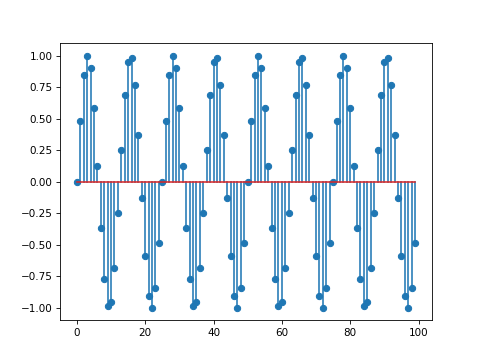

<ipython-input-60-cfdbfe83d466>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(n, x)


<StemContainer object of 3 artists>

In [60]:
n = np.arange(0, 100, 1)  # 100 discrete-time samples
f = 0.08                  # sinusoid frequency, in units of radians per sample
x = sin(2*pi*f*n)

fig, ax = plt.subplots()
ax.stem(n, x)

In the example above, we have used a stem plot to emphasize that the signal value is either unknown between the samples, or not defined. However, we will for convenience use matplotlib's continuous line plot going forward, with the understanding that the signal is only known/defined at integer sample indices. 

<IPython.core.display.Javascript object>


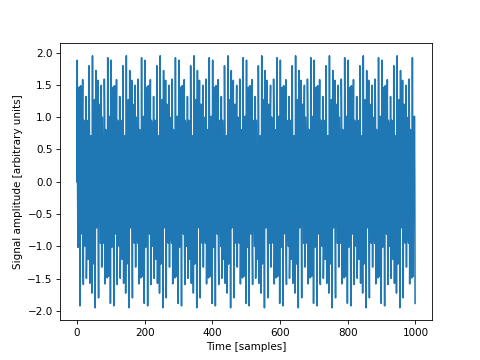

Text(0, 0.5, 'Signal amplitude [arbitrary units]')

In [47]:
n = np.arange(0, 1000, 1)  # 100 discrete-time samples
freqs = [0.2, 0.31]  # sinusoid frequencies, in units of radians per sample

# construct signal
x = 0
components = []
for f in freqs:
    comp = sin(2*pi*f*n)
    components.append(comp)
    x += comp

fig, ax = plt.subplots()
ax.plot(n, x)
ax.set_xlabel("Time [samples]")
ax.set_ylabel("Signal amplitude [arbitrary units]")

The signal above is a combination of 2 sines at two different frequencies. It's hard to even see that the signal is periodic unless you zoom out in time much further than the single sinusoid. 

The discrete Fourier transform (DFT) provides a formula for calculating the frequency content of a signal. A fundamental theoretical underpinning of DSP is that _any_ signal can be broken down into a sum of sines and cosines. Proving this fact is beyond the scope of this notebook. 

The DFT is a mathematical formula which can be calculated using any one of several slightly different algorithms. Any member of this family of algorithms is referred to as a *fast Fourier transform* (FFT). Below, we can call numpy's FFT function to show the *frequency content* or *spectral content* of our signal. 

<IPython.core.display.Javascript object>


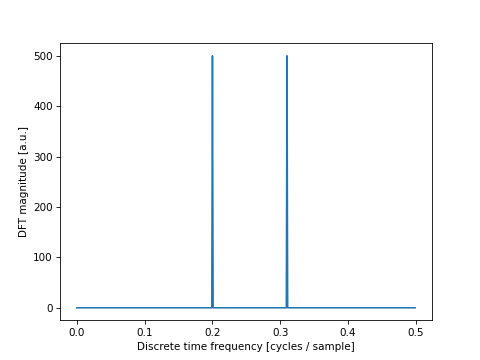

In [56]:
dsp_lib.plot_signal_spectrum(x)

This decomposition of a signal into its sinusoidal components is often referred to as the *spectrum* of a signal. (Analogous to white light being broken into the color spectrum). 

The highest discrete time (DT) frequency shown is 0.5. Why? For continuous time signals, there is no maximum frequency. Frequency is the number of cycles per second for a continuous time signal, and you can always have more cycles per second. However, for discrete time, the fastest a signal can cycle is 2 samples. For example:

... 1, -1, 1, -1, 1, -1 ...

The period of this signal is $T = 2$, and therefore its frequency is $f = 1/T = 0.5$

*Filtering* is a common operation in signal processing pipelines, which allows you to select which signal frequencies you want to let through and which ones you want to discard. 

In the example below, we will use an *infinite impulse response* (IIR) filter try to filter back one of the two sine curves which were combined to make the signal $x$

<IPython.core.display.Javascript object>


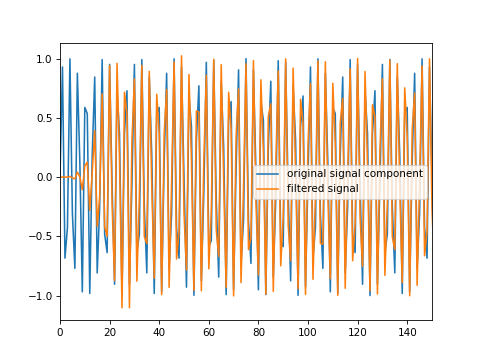

(0.0, 150.0)

In [57]:
filt_order = 7             # dimensionality of the filter. More on this below
filt_type = "band"

idx = 1                 # select which of the sinusoid frequencies you want to filter out

f_filt = freqs[idx]     # center frequency of filter
bandwidth = 0.1         # range of frequencies around the center frequency to allow

passband = [f_filt - bandwidth/2, f_filt + bandwidth/2]
passband[0] = max(passband[0], 0.001) # ensure minimum passband frequency is greater than 0
passband[1] = min(passband[1], 0.499) # ensure maximum passband frequency is less than 0.5

# calculate filter coefficients using Butterworth's algorithm
b, a = signal.iirfilter(filt_order, passband, btype='band', fs=1)

# run the filter on the summed signal
y = signal.lfilter(b, a, x)

plt.figure()
plt.plot(n, components[idx], label='original signal component')
plt.plot(n, y, label='filtered signal')

plt.legend()
plt.xlim([0, 150])

You'll notice that the filtered signal takes a while to "ramp up". This is a general property of filters when implemented in real time. The filter must assume some signal values prior to the start of the signal, and the default is to assume 0. It then takes the filter some amount of time to "forget" about the zero values it assumed at the initial condition. 

For any LTI filter, we can visualize its frequency response by calculating its *Fourier transform*. This is similar to the way we used the DFT to break a signal into its frequency components. Scipy has a method to do this built in, demonstrated below

<IPython.core.display.Javascript object>


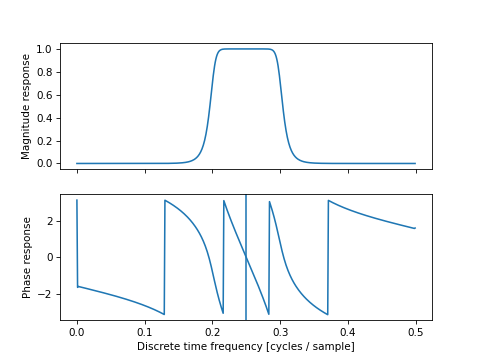

In [45]:
# Visualize the frequency response
dsp_lib.plot_freq_response(b, a)
plt.axvline(f_filt)